In [1]:
## Import relevant libraries
import sys
import os
import shutil
from natsort import natsorted  # For natural sorting
sys.path.append('../../activedrops')

## Including ourselves
import quadrop as qd
# qd.set_plotting_style()


import glob
import imageio
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
data_path = "../../data/K401_Kif3-piv/"

# let's declare the variable "conditions" to the sorted list of subdirectories from data_path
conditions = natsorted([f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))])

# let's declare the variable "subconditions" to the sorted list of subdirectories from the first condition
subconditions = natsorted([f for f in os.listdir(os.path.join(data_path, conditions[0])) if os.path.isdir(os.path.join(data_path, conditions[0], f))])[1:]

conditions, subconditions

(['k401', 'kif3'], ['rep1'])

In [3]:
min_frame = 0
max_frame = None
skip_frames=1
time_intervals = [2, 1]
frame_rate=15

In [4]:
# qd.convert_images(data_path, conditions, subconditions, max_frame=max_frame, skip_frames=skip_frames)

In [5]:
v = 10E-8
velocity_limits = (0, v)
other_limits = (-0.0005, 0.0005)


# velocity_limits = (None, None)
# other_limits = (None, None)


feature_limits = {
    'u [m/s]': (-v, v), 
    'v [m/s]': (-v, v), 
    'data type [-]': (None, None),
    'velocity magnitude [m/s]': velocity_limits,
    'vorticity [1/s]': other_limits,
    'divergence [1/s]': other_limits,
    'dcev [1]': (0, 250),
    'shear [1/s]': other_limits,
    'strain [1/s]': other_limits,
    'vector direction [degrees]': (-180, 180),
}


In [6]:
qd.process_piv_data(
    data_path=data_path, 
    conditions=conditions, 
    subconditions=subconditions, 
    feature_limits=feature_limits,
    time_intervals=time_intervals,
    min_frame=min_frame, 
    max_frame=max_frame,
    skip_frames=skip_frames, 
    plot_autocorrelation=False, 
    frame_rate=frame_rate, 
    heatmaps=False
)

In [7]:
# Usage example
features_pca = [
    "vorticity [1/s]_mean",
    "velocity magnitude [um/s]",
    "divergence [1/s]_mean",
    "shear [1/s]_mean",
    "strain [1/s]_mean",
    "correlation length [um]",
    "power [W]_mean",
    "work [J]",
]

qd.plot_PIV_features(
    data_path, 
    conditions, 
    subconditions, 
    features_pca, 
    time_intervals, 
    min_frame=0, 
    max_frame=max_frame,
    sigma=2,
    averages=True
    )

let's try to make the 3d plot with time vs protein concentration vs velocity

In [8]:
file = "../../data/K401_Kif3-piv/k401/rep1/dataframes_PIV/mean_values.csv"

# open the file
df_piv = pd.read_csv(file, ).iloc[75:,1:]
df_piv = df_piv.reset_index(drop=True)
df_piv= df_piv.reset_index().rename(columns={"index":"frame"})
df_piv

,frame,x [m]_mean,y [m]_mean,u [m/s]_mean,v [m/s]_mean,data type [-]_mean,vorticity [1/s]_mean,velocity magnitude [m/s]_mean,divergence [1/s]_mean,dcev [1]_mean,shear [1/s]_mean,strain [1/s]_mean,vector direction [degrees]_mean,correlation length [m]_mean,power [W]_mean
0,0,0.001410,0.001398,4.592328e-10,5.865591e-11,1.0,-6.166104e-07,1.838956e-09,1.932393e-06,3.379078,3.471373e-07,-3.537941e-08,-12.039043,0.000130,5.018924e-22
1,1,0.001410,0.001400,2.131064e-10,3.560384e-11,1.0,2.407012e-07,1.725270e-09,1.580674e-06,3.028635,1.408212e-06,2.477328e-07,-13.176637,0.000132,4.285723e-22
2,2,0.001408,0.001400,3.556540e-10,1.472451e-10,1.0,-4.046498e-07,1.753912e-09,1.342851e-06,2.154990,3.051065e-07,-9.940507e-07,-9.730378,0.000133,4.329472e-22
3,3,0.001408,0.001397,7.146110e-10,1.654316e-11,1.0,-5.036298e-09,1.917467e-09,1.058125e-06,2.422279,6.641173e-07,1.337746e-07,-9.405509,0.000159,3.627486e-22
4,4,0.001409,0.001398,3.953241e-10,2.874729e-10,1.0,-2.078638e-07,1.816208e-09,1.744710e-06,2.143456,8.246348e-07,-1.074696e-07,0.008454,0.000115,6.250781e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,603,0.001398,0.001412,3.734588e-10,-1.095270e-10,1.0,1.483355e-07,1.104787e-09,-1.961540e-07,1.804152,-4.142836e-07,3.858349e-07,-15.886977,0.000040,1.916343e-21
604,604,0.001399,0.001412,1.749555e-10,-2.003669e-10,1.0,-3.852272e-07,1.019131e-09,3.873840e-07,1.177091,2.363729e-07,2.870526e-07,-37.228867,0.000037,1.899973e-21
605,605,0.001399,0.001412,4.426674e-10,-4.687474e-11,1.0,-7.878161e-07,1.067406e-09,-5.858149e-08,2.066637,7.614709e-07,1.775444e-07,-8.232139,0.000040,1.765643e-21
606,606,0.001401,0.001412,-4.788484e-11,-2.125379e-10,1.0,-2.918865e-07,9.809529e-10,-4.938627e-08,2.212358,9.356893e-08,2.096722e-07,-51.849146,0.000033,2.149452e-21


In [9]:
import os
import numpy as np
import pandas as pd
import imageio.v2 as imageio
from scipy.ndimage import gaussian_filter1d
import glob

def save_fluorescence_data(data_path, conditions, subconditions, channel, time_intervals, min_frame, max_frame,
                           skip_frames=1, line_slope=1, line_intercept=0, timescale="h", averaged=True, subtract_first_datapoint=True):
    """
    Computes and saves the average fluorescence intensity and concentration over time for a given set of images across
    multiple conditions into a Pandas DataFrame, and then saves it as a CSV file. Averages across all subconditions for each condition.

    Parameters:
    - data_path (str): Base path where the images are stored.
    - conditions (list of str): List of condition names.
    - subconditions (list of str): List of subcondition names.
    - channel (str): Channel name.
    - time_intervals (list of int): List of time intervals between frames in seconds, one for each condition.
    - min_frame (int): Minimum frame number to process.
    - max_frame (int): Maximum frame number to process.
    """
    all_data = []

    # Define conversion factor based on the timescale
    time_conversion_factor = 1 / 3600 if timescale == "h" else 1 / 60

    for condition_idx, (condition, time_interval) in enumerate(zip(conditions, time_intervals)):
        current_time_interval = time_interval * time_conversion_factor  # Convert time_interval to the correct timescale
        condition_data = []

        for sub_idx, subcondition in enumerate(subconditions):
            directory_path = os.path.join(data_path, condition, subcondition, "original")

            if channel == "cy5":
                image_files = sorted(glob.glob(os.path.join(directory_path, "*cy5*.tif")))[min_frame:max_frame:skip_frames]
            elif channel == "gfp":
                image_files = sorted(glob.glob(os.path.join(directory_path, "*gfp*.tif")))[min_frame:max_frame:skip_frames]

            intensities = []
            for image_file in image_files:
                img = imageio.imread(image_file) / 2**16  # Normalize to 16-bit

                # Select ROI and compute mean intensity
                mean_intensity = np.mean(img[750:1250, 750:1250]) - np.min(img)
                intensities.append(mean_intensity)

                

            concentrations = [(intensity - 0.00159) / 0.00042 for intensity in intensities]
            concentrations = gaussian_filter1d(concentrations, sigma=2)

            if subtract_first_datapoint:
                concentrations = np.array(concentrations) - concentrations[0]

            frames = [i * skip_frames for i in range(len(concentrations))]
            data = pd.DataFrame({'frame': frames, 'Intensity': intensities, 'Concentration': concentrations})
       

            condition_data.append(data)

        if averaged:
            # Compute the average across subconditions
            avg_data = pd.concat(condition_data).groupby('frame').mean().reset_index()
            avg_data['Condition_Subcondition'] = f"{condition}_avg"
            all_data.append(avg_data)

    result_df = pd.concat(all_data, ignore_index=True)
    output_csv_path = os.path.join(data_path, f"{channel}_averaged_fluorescence_data.csv")
    result_df.to_csv(output_csv_path, index=False)
    return output_csv_path



In [10]:
data_path = "../../data/temperatures-k401_kif3_kif5/"

# let's declare the variable "conditions" to the sorted list of subdirectories from data_path
conditions = natsorted([f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))])

# let's declare the variable "subconditions" to the sorted list of subdirectories from the first condition
subconditions = natsorted([f for f in os.listdir(os.path.join(data_path, conditions[0])) if os.path.isdir(os.path.join(data_path, conditions[0], f))])

conditions, subconditions

(['k401-20C', 'k401-30C', 'kif3-20C', 'kif3-30C', 'kif5-20C', 'kif5-30C'],
 ['Pos0'])

In [11]:
conditions = ['k401-20C']
conditions

['k401-20C']

In [12]:
save_fluorescence_data(data_path, conditions, subconditions, 'gfp', [180], min_frame=50, max_frame=None, skip_frames=1, line_slope=1, line_intercept=0, timescale="h", averaged=True, subtract_first_datapoint=False)


'../../data/temperatures-k401_kif3_kif5/gfp_averaged_fluorescence_data.csv'

In [13]:
df_fluorescence = pd.read_csv("../../data/temperatures-k401_kif3_kif5/gfp_averaged_fluorescence_data.csv")


In [14]:
df_fluorescence

,frame,Intensity,Concentration,Condition_Subcondition
0,0,0.002346,1.788569,k401-20C_avg
1,1,0.002338,1.740809,k401-20C_avg
2,2,0.002529,1.645250,k401-20C_avg
3,3,0.002064,1.517827,k401-20C_avg
4,4,0.002161,1.394101,k401-20C_avg
...,...,...,...,...
416,416,0.009499,18.487155,k401-20C_avg
417,417,0.009403,18.584536,k401-20C_avg
418,418,0.009354,18.657262,k401-20C_avg
419,419,0.009658,18.699330,k401-20C_avg


In [15]:
df_piv

,frame,x [m]_mean,y [m]_mean,u [m/s]_mean,v [m/s]_mean,data type [-]_mean,vorticity [1/s]_mean,velocity magnitude [m/s]_mean,divergence [1/s]_mean,dcev [1]_mean,shear [1/s]_mean,strain [1/s]_mean,vector direction [degrees]_mean,correlation length [m]_mean,power [W]_mean
0,0,0.001410,0.001398,4.592328e-10,5.865591e-11,1.0,-6.166104e-07,1.838956e-09,1.932393e-06,3.379078,3.471373e-07,-3.537941e-08,-12.039043,0.000130,5.018924e-22
1,1,0.001410,0.001400,2.131064e-10,3.560384e-11,1.0,2.407012e-07,1.725270e-09,1.580674e-06,3.028635,1.408212e-06,2.477328e-07,-13.176637,0.000132,4.285723e-22
2,2,0.001408,0.001400,3.556540e-10,1.472451e-10,1.0,-4.046498e-07,1.753912e-09,1.342851e-06,2.154990,3.051065e-07,-9.940507e-07,-9.730378,0.000133,4.329472e-22
3,3,0.001408,0.001397,7.146110e-10,1.654316e-11,1.0,-5.036298e-09,1.917467e-09,1.058125e-06,2.422279,6.641173e-07,1.337746e-07,-9.405509,0.000159,3.627486e-22
4,4,0.001409,0.001398,3.953241e-10,2.874729e-10,1.0,-2.078638e-07,1.816208e-09,1.744710e-06,2.143456,8.246348e-07,-1.074696e-07,0.008454,0.000115,6.250781e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,603,0.001398,0.001412,3.734588e-10,-1.095270e-10,1.0,1.483355e-07,1.104787e-09,-1.961540e-07,1.804152,-4.142836e-07,3.858349e-07,-15.886977,0.000040,1.916343e-21
604,604,0.001399,0.001412,1.749555e-10,-2.003669e-10,1.0,-3.852272e-07,1.019131e-09,3.873840e-07,1.177091,2.363729e-07,2.870526e-07,-37.228867,0.000037,1.899973e-21
605,605,0.001399,0.001412,4.426674e-10,-4.687474e-11,1.0,-7.878161e-07,1.067406e-09,-5.858149e-08,2.066637,7.614709e-07,1.775444e-07,-8.232139,0.000040,1.765643e-21
606,606,0.001401,0.001412,-4.788484e-11,-2.125379e-10,1.0,-2.918865e-07,9.809529e-10,-4.938627e-08,2.212358,9.356893e-08,2.096722e-07,-51.849146,0.000033,2.149452e-21


In [16]:
# now we can merge the PIV and fluorescence dataframes
df_merged = pd.merge(df_piv, df_fluorescence, on='frame')
df_merged["work [J]"] = df_merged["power [W]_mean"].cumsum()
df_merged

,frame,x [m]_mean,y [m]_mean,u [m/s]_mean,v [m/s]_mean,data type [-]_mean,vorticity [1/s]_mean,velocity magnitude [m/s]_mean,divergence [1/s]_mean,dcev [1]_mean,shear [1/s]_mean,strain [1/s]_mean,vector direction [degrees]_mean,correlation length [m]_mean,power [W]_mean,Intensity,Concentration,Condition_Subcondition,work [J]
0,0,0.001410,0.001398,4.592328e-10,5.865591e-11,1.0,-6.166104e-07,1.838956e-09,1.932393e-06,3.379078,3.471373e-07,-3.537941e-08,-12.039043,0.000130,5.018924e-22,0.002346,1.788569,k401-20C_avg,5.018924e-22
1,1,0.001410,0.001400,2.131064e-10,3.560384e-11,1.0,2.407012e-07,1.725270e-09,1.580674e-06,3.028635,1.408212e-06,2.477328e-07,-13.176637,0.000132,4.285723e-22,0.002338,1.740809,k401-20C_avg,9.304647e-22
2,2,0.001408,0.001400,3.556540e-10,1.472451e-10,1.0,-4.046498e-07,1.753912e-09,1.342851e-06,2.154990,3.051065e-07,-9.940507e-07,-9.730378,0.000133,4.329472e-22,0.002529,1.645250,k401-20C_avg,1.363412e-21
3,3,0.001408,0.001397,7.146110e-10,1.654316e-11,1.0,-5.036298e-09,1.917467e-09,1.058125e-06,2.422279,6.641173e-07,1.337746e-07,-9.405509,0.000159,3.627486e-22,0.002064,1.517827,k401-20C_avg,1.726160e-21
4,4,0.001409,0.001398,3.953241e-10,2.874729e-10,1.0,-2.078638e-07,1.816208e-09,1.744710e-06,2.143456,8.246348e-07,-1.074696e-07,0.008454,0.000115,6.250781e-22,0.002161,1.394101,k401-20C_avg,2.351239e-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,416,0.001394,0.001412,4.792695e-10,5.340494e-10,1.0,-5.869789e-07,2.758034e-09,-4.141962e-07,2.247706,-2.633662e-07,5.874935e-07,11.106545,0.000264,2.735396e-22,0.009499,18.487155,k401-20C_avg,7.517503e-19
417,417,0.001395,0.001414,1.484318e-10,5.638378e-10,1.0,-4.256283e-07,2.670022e-09,3.058552e-07,2.907575,-2.972119e-07,3.601342e-07,12.525259,0.000264,2.549389e-22,0.009403,18.584536,k401-20C_avg,7.520052e-19
418,418,0.001395,0.001412,2.841359e-10,6.648018e-10,1.0,-7.126156e-07,2.663669e-09,-2.186894e-07,3.013225,1.198218e-06,-2.232965e-08,15.468450,0.000281,2.254210e-22,0.009354,18.657262,k401-20C_avg,7.522306e-19
419,419,0.001395,0.001414,5.097970e-10,6.146965e-10,1.0,5.753977e-08,2.677494e-09,2.906357e-07,3.232711,6.599794e-07,1.133044e-06,14.465588,0.000280,2.293530e-22,0.009658,18.699330,k401-20C_avg,7.524600e-19


In [17]:
# now just turn the 'frame' column into time_sec by taking those units as seconds
df_merged['time_sec'] = df_merged['frame'] * 180

df_merged

,frame,x [m]_mean,y [m]_mean,u [m/s]_mean,v [m/s]_mean,data type [-]_mean,vorticity [1/s]_mean,velocity magnitude [m/s]_mean,divergence [1/s]_mean,dcev [1]_mean,shear [1/s]_mean,strain [1/s]_mean,vector direction [degrees]_mean,correlation length [m]_mean,power [W]_mean,Intensity,Concentration,Condition_Subcondition,work [J],time_sec
0,0,0.001410,0.001398,4.592328e-10,5.865591e-11,1.0,-6.166104e-07,1.838956e-09,1.932393e-06,3.379078,3.471373e-07,-3.537941e-08,-12.039043,0.000130,5.018924e-22,0.002346,1.788569,k401-20C_avg,5.018924e-22,0
1,1,0.001410,0.001400,2.131064e-10,3.560384e-11,1.0,2.407012e-07,1.725270e-09,1.580674e-06,3.028635,1.408212e-06,2.477328e-07,-13.176637,0.000132,4.285723e-22,0.002338,1.740809,k401-20C_avg,9.304647e-22,180
2,2,0.001408,0.001400,3.556540e-10,1.472451e-10,1.0,-4.046498e-07,1.753912e-09,1.342851e-06,2.154990,3.051065e-07,-9.940507e-07,-9.730378,0.000133,4.329472e-22,0.002529,1.645250,k401-20C_avg,1.363412e-21,360
3,3,0.001408,0.001397,7.146110e-10,1.654316e-11,1.0,-5.036298e-09,1.917467e-09,1.058125e-06,2.422279,6.641173e-07,1.337746e-07,-9.405509,0.000159,3.627486e-22,0.002064,1.517827,k401-20C_avg,1.726160e-21,540
4,4,0.001409,0.001398,3.953241e-10,2.874729e-10,1.0,-2.078638e-07,1.816208e-09,1.744710e-06,2.143456,8.246348e-07,-1.074696e-07,0.008454,0.000115,6.250781e-22,0.002161,1.394101,k401-20C_avg,2.351239e-21,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,416,0.001394,0.001412,4.792695e-10,5.340494e-10,1.0,-5.869789e-07,2.758034e-09,-4.141962e-07,2.247706,-2.633662e-07,5.874935e-07,11.106545,0.000264,2.735396e-22,0.009499,18.487155,k401-20C_avg,7.517503e-19,74880
417,417,0.001395,0.001414,1.484318e-10,5.638378e-10,1.0,-4.256283e-07,2.670022e-09,3.058552e-07,2.907575,-2.972119e-07,3.601342e-07,12.525259,0.000264,2.549389e-22,0.009403,18.584536,k401-20C_avg,7.520052e-19,75060
418,418,0.001395,0.001412,2.841359e-10,6.648018e-10,1.0,-7.126156e-07,2.663669e-09,-2.186894e-07,3.013225,1.198218e-06,-2.232965e-08,15.468450,0.000281,2.254210e-22,0.009354,18.657262,k401-20C_avg,7.522306e-19,75240
419,419,0.001395,0.001414,5.097970e-10,6.146965e-10,1.0,5.753977e-08,2.677494e-09,2.906357e-07,3.232711,6.599794e-07,1.133044e-06,14.465588,0.000280,2.293530e-22,0.009658,18.699330,k401-20C_avg,7.524600e-19,75420


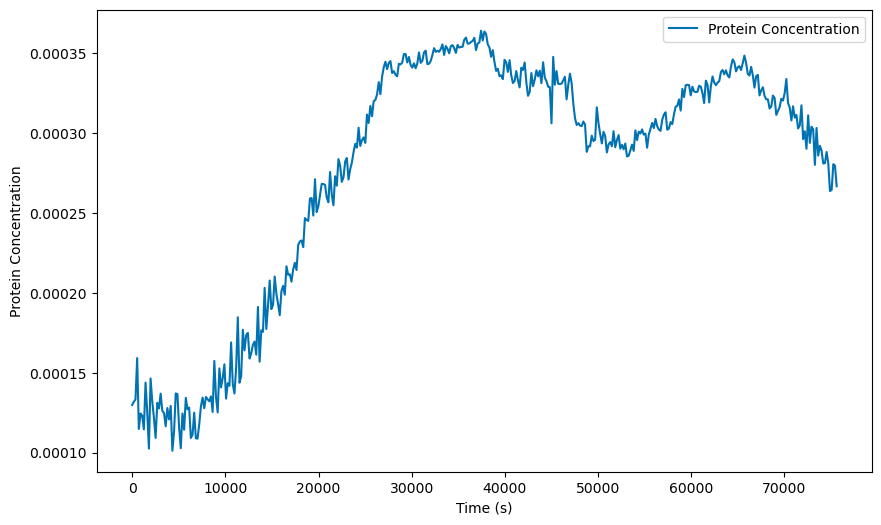

In [18]:
# now let's plot protein_concentration vs time_sec
plt.figure(figsize=(10, 6))
plt.plot(df_merged['time_sec'], df_merged['correlation length [m]_mean'], label='Protein Concentration')
plt.xlabel('Time (s)')
plt.ylabel('Protein Concentration')
plt.legend()
plt.show()

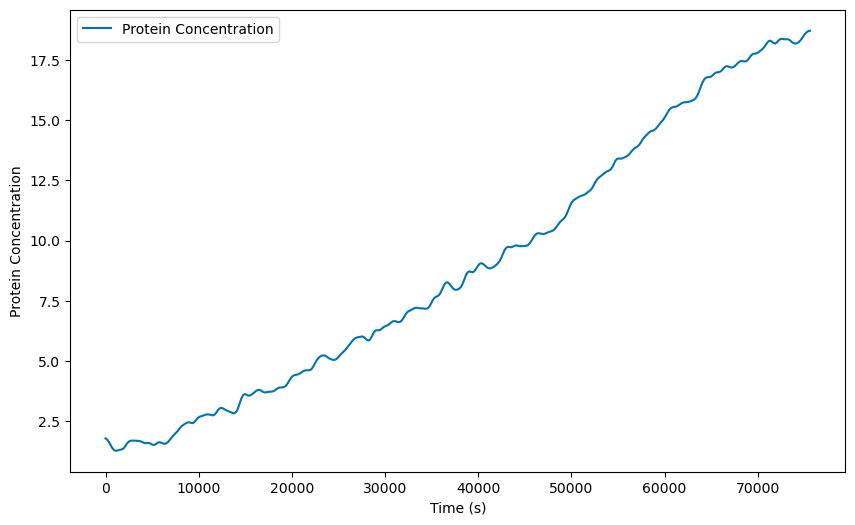

In [19]:
# now let's plot protein_concentration vs time_sec
plt.figure(figsize=(10, 6))
plt.plot(df_merged['time_sec'], df_merged['Concentration'], label='Protein Concentration')
plt.xlabel('Time (s)')
plt.ylabel('Protein Concentration')
plt.legend()
plt.show()

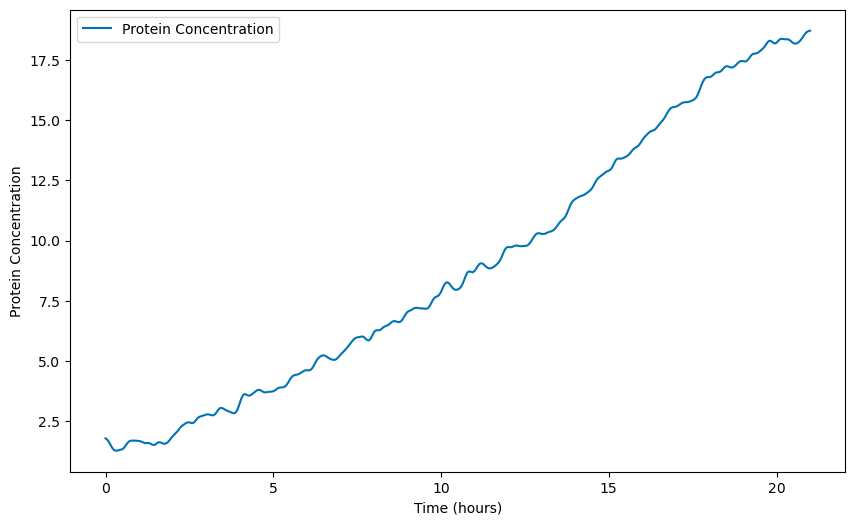

In [20]:
# now let's plot protein_concentration vs time_hours
plt.figure(figsize=(10, 6))
plt.plot(df_merged['time_sec'] / 3600, df_merged['Concentration'], label='Protein Concentration')
plt.xlabel('Time (hours)')
plt.ylabel('Protein Concentration')
plt.legend()
plt.show()

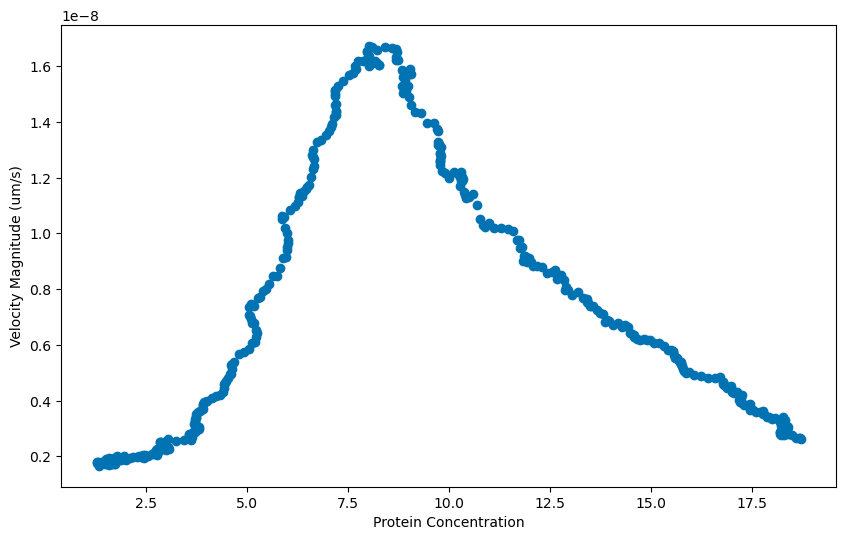

In [21]:
# now plot protein_concentration vs velocity_magnitude
plt.figure(figsize=(10, 6))
plt.scatter( df_merged['Concentration'], df_merged['velocity magnitude [m/s]_mean'])
plt.ylabel('Velocity Magnitude (um/s)')
plt.xlabel('Protein Concentration')
plt.show()

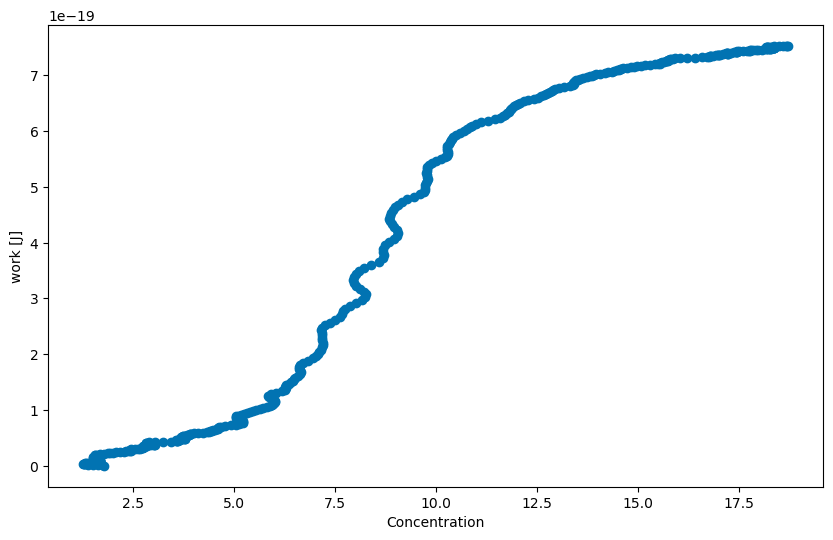

In [22]:
# now plot protein_concentration vs velocity_magnitude
plt.figure(figsize=(10, 6))
plt.scatter( df_merged['Concentration'], df_merged['work [J]'])
plt.xlabel('Concentration')
plt.ylabel('work [J]')
plt.show()

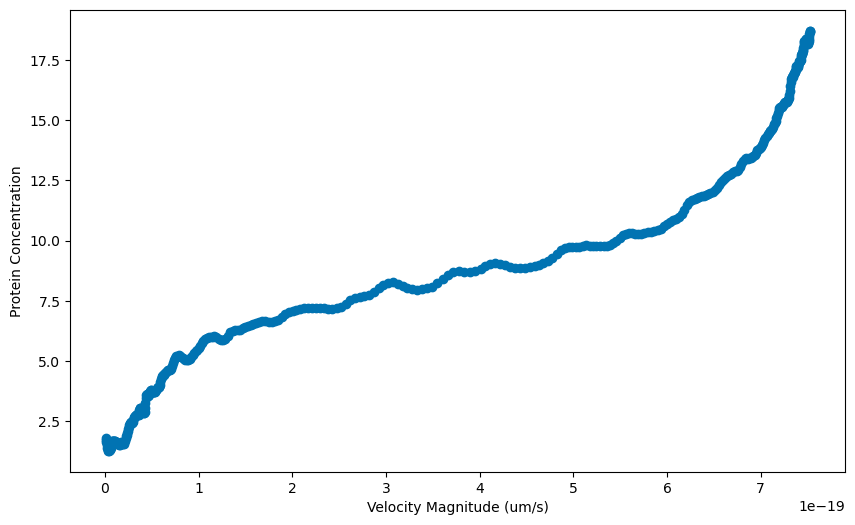

In [23]:
# now plot protein_concentration vs velocity_magnitude
plt.figure(figsize=(10, 6))
plt.scatter( df_merged['work [J]'], df_merged['Concentration'] )
plt.xlabel('Velocity Magnitude (um/s)')
plt.ylabel('Protein Concentration')
plt.show()

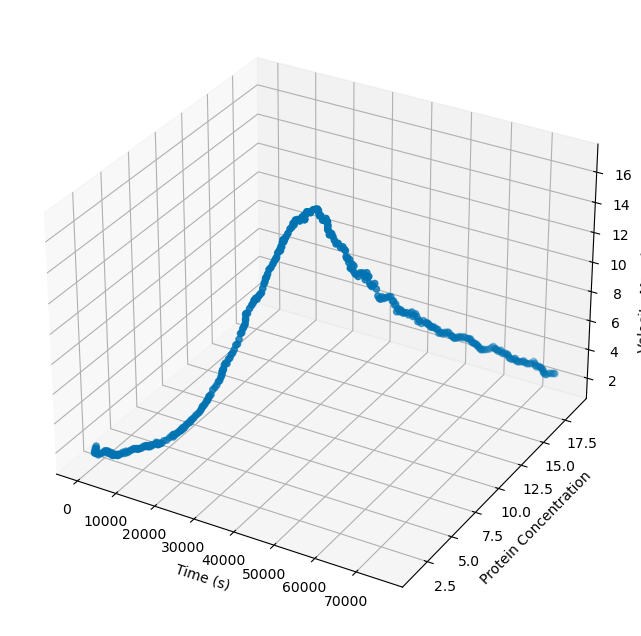

In [24]:
# create 3d plot with time, protein concentration and velocity magnitude
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_merged['time_sec'], df_merged['Concentration'], df_merged['velocity magnitude [m/s]_mean'] * 1000000000)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Protein Concentration')
ax.set_zlabel('Velocity Magnitude (m/s)')
plt.show()

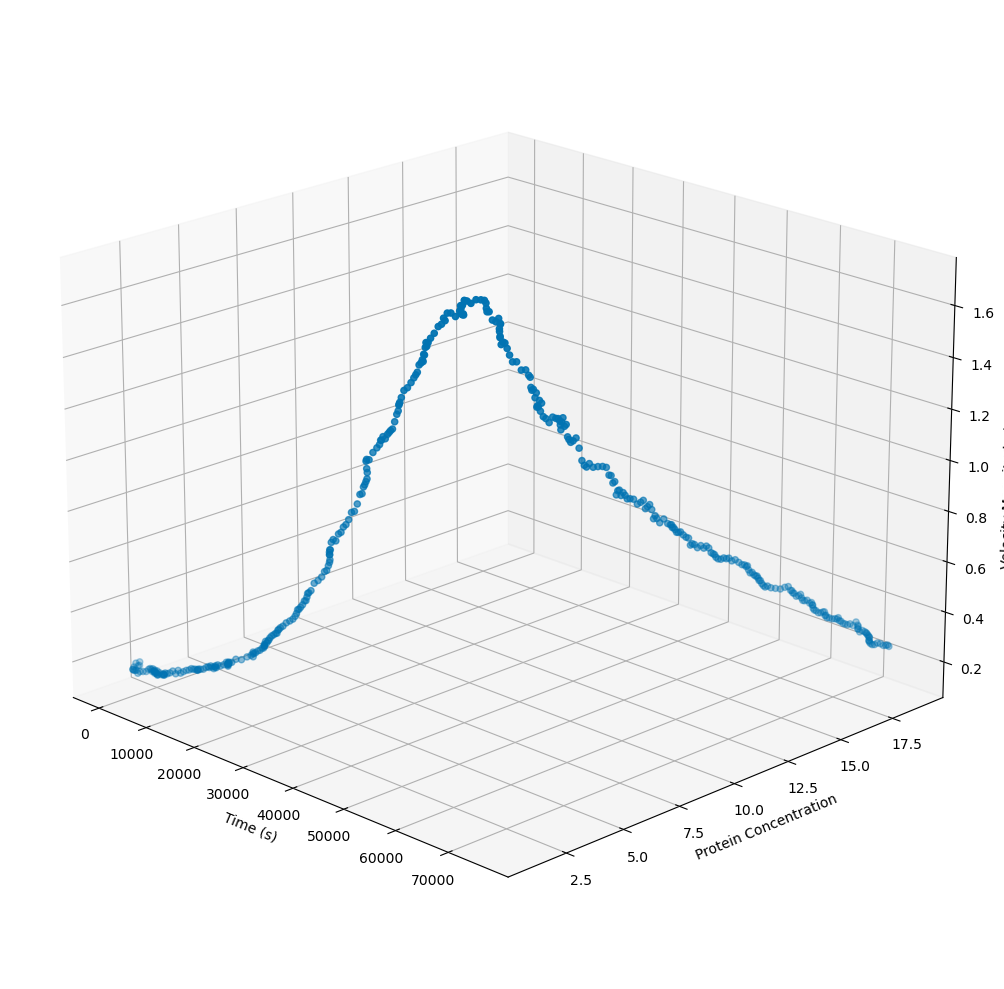

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assume df_merged is already defined and has the columns: 'time_sec', 'Concentration', and 'velocity magnitude [m/s]_mean'

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_merged['time_sec'], df_merged['Concentration'], df_merged['velocity magnitude [m/s]_mean'])

ax.set_xlabel('Time (s)')
ax.set_ylabel('Protein Concentration')
ax.set_zlabel('Velocity Magnitude (m/s)')

# Manually adjust the margins or viewing angle if needed
ax.view_init(elev=20, azim=-45)  # Adjust the viewing angle for better visibility of labels

# Adjust layout to make space for labels
plt.tight_layout()  # This can help ensure that the labels don't get cut off

plt.show()


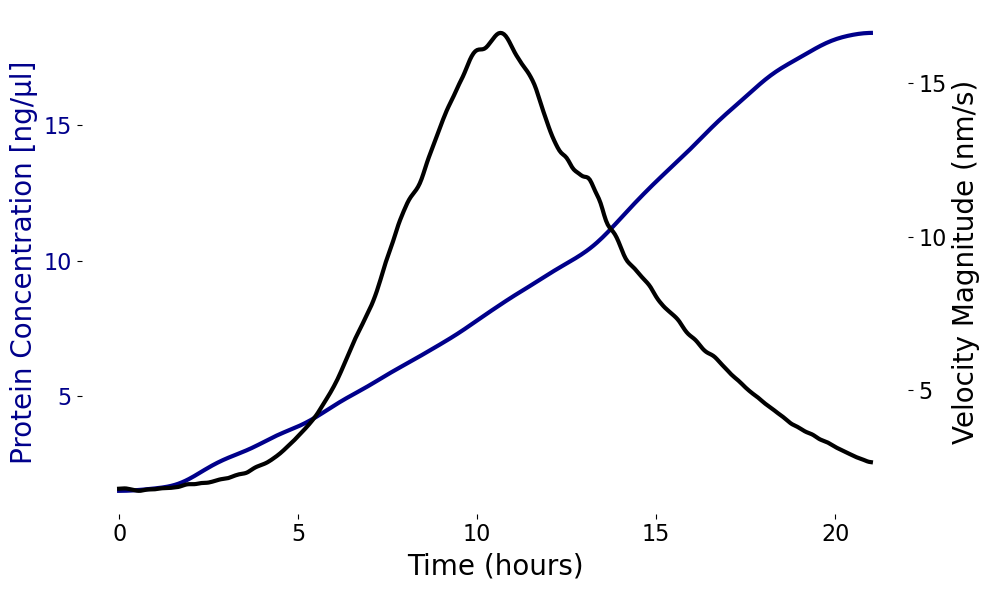

In [26]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib.ticker import MaxNLocator

# Assuming df_merged is already loaded and contains 'time_sec', 'Concentration', and 'velocity magnitude [m/s]_mean'

# Applying a Gaussian filter with sigma = 2 to the data for smoothing
smoothed_concentration = gaussian_filter1d(df_merged['Concentration'], sigma=10)
smoothed_velocity = gaussian_filter1d(df_merged['velocity magnitude [m/s]_mean'], sigma=2)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Settings for larger fonts
label_font_size = 20  # Font size for labels
title_font_size = 20  # Font size for titles
tick_font_size = 16   # Font size for tick labels

# Plotting protein concentration
color = 'darkblue'  # Color for protein concentration
ax1.set_xlabel('Time (hours)', fontsize=label_font_size)
ax1.set_ylabel('Protein Concentration [ng/µl]', color=color, fontsize=label_font_size)
ax1.plot(df_merged['time_sec'] / 3600, smoothed_concentration, color=color, linewidth=3)  # Thicker line with Gaussian smoothing
ax1.tick_params(axis='y', labelcolor=color, labelsize=tick_font_size)
ax1.tick_params(axis='x', labelsize=tick_font_size)  # Set font size for x-axis tick labels
ax1.xaxis.set_major_locator(MaxNLocator(5))  # Limit the number of x-axis ticks to 5
ax1.yaxis.set_major_locator(MaxNLocator(4))  # Limit the number of y-axis ticks to 5

# Setting spines to be invisible or a lighter color
for spine in ax1.spines.values():
    spine.set_visible(False)  # Make spines invisible

# Creating a second y-axis for velocity magnitude
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'black'  # Dark red color for velocity magnitude
ax2.set_ylabel('Velocity Magnitude (nm/s)', color=color, fontsize=label_font_size)
ax2.plot(df_merged['time_sec'] / 3600, smoothed_velocity * 1E9, color=color, linewidth=3)  # Thicker line with Gaussian smoothing
ax2.tick_params(axis='y', labelcolor=color, labelsize=tick_font_size)
ax2.yaxis.set_major_locator(MaxNLocator(4))  # Limit the number of y-axis ticks to 5

# Optionally, also adjust the spines for ax2 if needed
for spine in ax2.spines.values():
    spine.set_visible(False)  # Make spines invisible

fig.tight_layout()  # Adjust layout to make sure everything fits and labels are not clipped

# Save the figure with 300 dpi
plt.savefig('plot.png', dpi=500)
plt.show()


In [27]:
df_merged.columns

Index(['frame', 'x [m]_mean', 'y [m]_mean', 'u [m/s]_mean', 'v [m/s]_mean',
       'data type [-]_mean', 'vorticity [1/s]_mean',
       'velocity magnitude [m/s]_mean', 'divergence [1/s]_mean',
       'dcev [1]_mean', 'shear [1/s]_mean', 'strain [1/s]_mean',
       'vector direction [degrees]_mean', 'correlation length [m]_mean',
       'power [W]_mean', 'Intensity', 'Concentration',
       'Condition_Subcondition', 'work [J]', 'time_sec'],
      dtype='object')

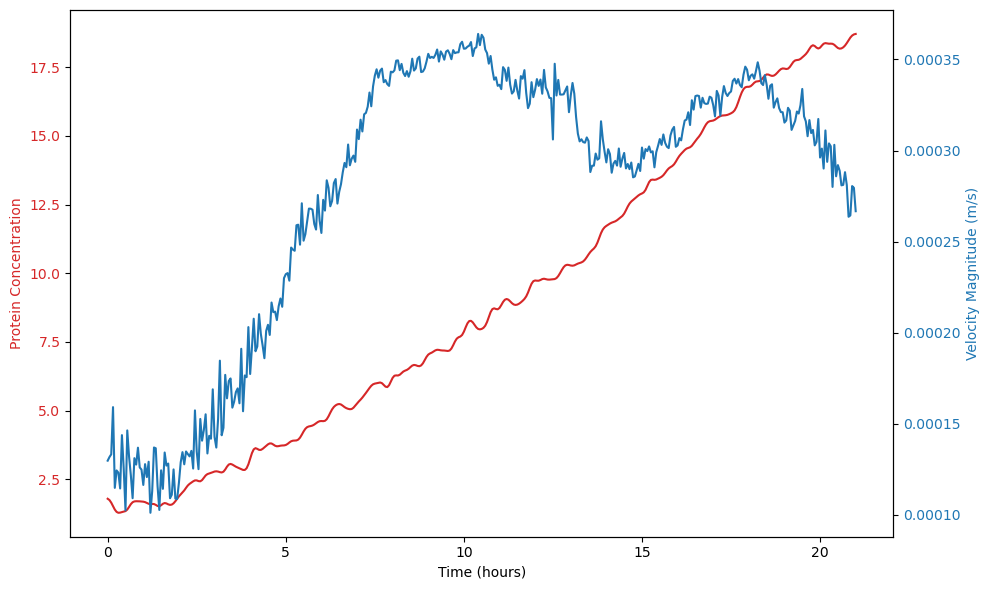

In [28]:
# now let's plot protein_concentration vs time in hours, adding a second y axis for the velocity magnitude
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Protein Concentration', color=color)
ax1.plot(df_merged['time_sec'] / 3600, df_merged['Concentration'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Velocity Magnitude (m/s)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_merged['time_sec'] / 3600, df_merged['correlation length [m]_mean'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()